In [11]:
import numpy as np
import pandas as pd
import shutil
import os
from os import listdir
from imblearn.over_sampling import SMOTE
import sys
import sys
from skimage.io import imread, imshow
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import mahotas
from natsort import natsorted
import cv2
import os
import h5py


import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib

In [7]:
# labels = pd.read_csv("./bonus-sml-2020/SML_Train.csv")

# # Create `train_sep` directory
# train_dir = './bonus-sml-2020/SML_Train/'
# train_sep_dir = './bonus-sml-2020/train_sep/'
# if not os.path.exists(train_sep_dir):
#     os.mkdir(train_sep_dir)

# for filename, class_name in labels.values:
#     # Create subdirectory with `class_name`
#     if not os.path.exists(train_sep_dir + str(class_name)):
#         os.mkdir(train_sep_dir + str(class_name))
#     src_path = train_dir + filename
#     dst_path = train_sep_dir + str(class_name) + '/' + filename
#     try:
#         shutil.copy(src_path, dst_path)
#     except IOError as e:
#         print('Unable to copy file {} to {}'
#               .format(src_path, dst_path))
#     except:
#         print('When try copy file {} to {}, unexpected error: {}'
#               .format(src_path, dst_path, sys.exc_info()))

In [12]:
# feature-descriptor-1: Hu Moments
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [13]:
#images_per_class = 80
fixed_size       = tuple((500, 500))
train_path       = "./bonus-sml-2020/train_sep_new1/"
h5_data          = './bonus-sml-2020/output/data.h5'
h5_labels        = './bonus-sml-2020/output/labels.h5'
bins             = 8

In [14]:
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [15]:
def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    # return the result
    return haralick

In [16]:
def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    # return the histogram
    return hist.flatten()

In [20]:
train_labels = os.listdir(train_path)
print(train_labels)
train_labels = list(map(int, train_labels))

# sort the training labels
train_labels.sort()
print(train_labels)

# empty lists to hold feature vectors and labels
global_features = []
labels          = []

['20', '18', '9', '0', '11', '7', '16', '6', '17', '1', '10', '19', '8', '21', '24', '23', '4', '15', '3', '12', '2', '13', '5', '14', '22']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [21]:
# mom: (7,)
# har: (13,)
# hist: (512,)
# gloval: (532,)

In [22]:
for training_name in train_labels:
    # join the training data path and each species training folder
    dir = os.path.join(train_path, str(training_name))

    # get the current training label
    current_label = training_name

    # loop over the images in each sub-folder
    for file in listdir(dir):
        # get the image file name
        # read the image and resize it to a fixed-size
        image = cv2.imread(dir+'/'+file)
        image = cv2.resize(image, fixed_size)

        ####################################
        # Global Feature extraction
        ####################################
        fv_hu_moments = fd_hu_moments(image)
        #print("mom:",fv_hu_moments.shape)
        fv_haralick   = fd_haralick(image)
        #print("har:",fv_haralick.shape)
        fv_histogram  = fd_histogram(image)
        #print("hist:",fv_histogram.shape)
        ###################################
        # Concatenate global features
        ###################################
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
        #print("gloval:",global_feature.shape)

        # update the list of labels and feature vectors
        labels.append(current_label)
        global_features.append(global_feature)

    print("Done")

print("Done")

Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


In [23]:
print(np.array(global_features).shape)

# get the overall training label size
print(np.array(labels).shape)

# encode the target labels
# targetNames = np.unique(labels)
# le          = LabelEncoder()
# target      = le.fit_transform(labels)
# print("[STATUS] training labels encoded...")
target=labels
print(np.array(target).shape)

# scale features in the range (0-1)
scaler            = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)


# save the feature vector using HDF5
h5f_data = h5py.File(h5_data, 'w')
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

h5f_label = h5py.File(h5_labels, 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))

h5f_data.close()
h5f_label.close()

print("[STATUS] end of training..")

(24550, 532)
(24550,)
(24550,)
[STATUS] end of training..


In [24]:
num_trees = 100
test_size = 0.10
seed      = 9
train_path = "./bonus-sml-2020/train_sep_new1/"
test_path  = "./bonus-sml-2020/SML_Test/"
h5_data          = './bonus-sml-2020/output/data.h5'
h5_labels        = './bonus-sml-2020/output/labels.h5'
scoring    = "accuracy"

In [32]:
models = []
#models.append(('LR', LogisticRegression(random_state=seed)))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(random_state=seed)))


results = []
names   = []

# import the feature vector and trained labels
h5f_data  = h5py.File(h5_data, 'r')
h5f_label = h5py.File(h5_labels, 'r')

global_features_string = h5f_data['dataset_1']
global_labels_string   = h5f_label['dataset_1']

global_features = np.array(global_features_string)
global_labels   = np.array(global_labels_string)

h5f_data.close()
h5f_label.close()

print(np.array(global_features).shape)

# get the overall training label size
print(np.array(global_labels).shape)

(24550, 532)
(24550,)


In [33]:
# split the training and testing data
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

print("[STATUS] splitted train and test data...")
print("Train data  : {}",trainDataGlobal.shape)
print("Test data   : {}",testDataGlobal.shape)
print("Train labels: {}",trainLabelsGlobal.shape)
print("Test labels : {}",testLabelsGlobal.shape)

[STATUS] splitted train and test data...
Train data  : {} (22095, 532)
Test data   : {} (2455, 532)
Train labels: {} (22095,)
Test labels : {} (2455,)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.381715 (0.005813)


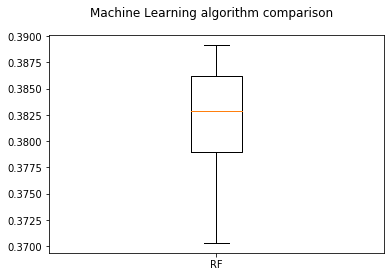

In [34]:
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [35]:
global_features_test=[]
for file in natsorted(listdir(test_path)):
        # get the image file name
        # read the image and resize it to a fixed-size
        image = cv2.imread(test_path+file)
        image = cv2.resize(image, fixed_size)

        ####################################
        # Global Feature extraction
        ####################################
        fv_hu_moments = fd_hu_moments(image)
        #print("mom:",fv_hu_moments.shape)
        fv_haralick   = fd_haralick(image)
        #print("har:",fv_haralick.shape)
        fv_histogram  = fd_histogram(image)
        #print("hist:",fv_histogram.shape)
        ###################################
        # Concatenate global features
        ###################################
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
        #print("gloval:",global_feature.shape)

        # update the list of labels and feature vectors
        global_features_test.append(global_feature)

print("Done")


Done


In [36]:
print(np.array(rescaled_features).shape)

(24550, 532)


In [37]:
scaler            = MinMaxScaler(feature_range=(0, 1))
rescaled_features_test = scaler.fit_transform(global_features_test)


In [38]:
import matplotlib.pyplot as plt

# create the model - Random Forests
#clf  = RandomForestClassifier(n_estimators=num_trees, random_state=seed)
clf=LogisticRegression(random_state=seed)
# fit the training data to the model
clf.fit(trainDataGlobal, trainLabelsGlobal)
prediction=[]

y_test = clf.predict(rescaled_features_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
print(y_test[0:20])

[21  2  6  9  6 19 17  9  8 14 19 16  9  9  9 22 22 10 19  9]


In [40]:
print(len(y_test))

1500


In [41]:
def helper(direc):
    files=[]
    for filename in natsorted(listdir(direc)):
        files.append(filename)
    return files

files=helper('./bonus-sml-2020/SML_Test/')
data_res=pd.DataFrame()
data_res['id']=files
data_res['category']=y_test
data_res.to_csv (r'sample_submission.csv', index = False, header=True)

# chnage

In [4]:
    y_train=pd.read_csv("./bonus-sml-2020/SML_Train.csv")['category']
    y_train=y_train.to_numpy()
    unique,count=np.unique(y_train,return_counts=True)
    temp_dict={k:v for(k,v) in zip(unique,count)}
    print(temp_dict)

{0: 576, 1: 669, 2: 486, 3: 682, 4: 982, 5: 649, 6: 448, 7: 454, 8: 848, 9: 529, 10: 883, 11: 448, 12: 539, 13: 515, 14: 515, 15: 493, 16: 834, 17: 797, 18: 705, 19: 860, 20: 553, 21: 573, 22: 518, 23: 631, 24: 813}


In [7]:
def readImages(direc):
    loaded_images = []
    for filename in natsorted(listdir(direc)):
        img_data =cv2.imread(direc+ filename)
        img=cv2.cvtColor(img_data,cv2.COLOR_BGR2RGB)
        #img = cv2.imread('./bonus-sml-2020/SML_Test/Test_128.jpg')
        loaded_images.append(img_data.flatten())
    return loaded_images

In [8]:
X_train=readImages('./bonus-sml-2020/SML_Train/')
y_train=pd.read_csv("./bonus-sml-2020/SML_Train.csv")['category']
y_train=y_train.to_numpy()
X_train=np.asarray(X_train)
print("Lnegth of images:",X_train[0].shape)
print("No of images:",X_train.shape)
print("Train label:",len(y_train))
print(type(X_train))

Lnegth of images: (12288,)
No of images: (16000, 12288)
Train label: 16000
<class 'numpy.ndarray'>


In [9]:
    smt = SMOTE(random_state=42)
    X_train, y_train = smt.fit_sample(X_train,y_train)
    unique,count=np.unique(y_train,return_counts=True)
    temp_dict={k:v for(k,v) in zip(unique,count)}
    print(temp_dict)

{0: 982, 1: 982, 2: 982, 3: 982, 4: 982, 5: 982, 6: 982, 7: 982, 8: 982, 9: 982, 10: 982, 11: 982, 12: 982, 13: 982, 14: 982, 15: 982, 16: 982, 17: 982, 18: 982, 19: 982, 20: 982, 21: 982, 22: 982, 23: 982, 24: 982}


In [36]:
# # print(X_train.shape)

# # cv2.imwrite('color_img.png', X_train[1].reshape((64, 64, 3)))

# img = cv2.imread('./bonus-sml-2020/SML_Test/Test_128.jpg')
# X=img.flatten()
# print(len(X))
# y=X.reshape((64, 64, 3))
# y=cv2.cvtColor(y,cv2.COLOR_BGR2RGB)
# img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# plt.imshow(y)
# print(img.shape)

(24550, 12288)


True

In [10]:


# Create `train_sep` directory
train_sep_dir = './bonus-sml-2020/train_sep_new1/'
if not os.path.exists(train_sep_dir):
    os.mkdir(train_sep_dir)
count=1
for i in range(len(y_train)):
    # Create subdirectory with `class_name`
    class_=y_train[i]
    
    if not os.path.exists(train_sep_dir + str(class_)):
        os.mkdir(train_sep_dir + str(class_))
    cv2.imwrite(train_sep_dir + str(class_)+'/'+'Train_'+str(count)+'.png', X_train[i].reshape((64, 64, 3)))
    count+=1